In [13]:
# prompt: Write the code to import necessary libraries for a classification project of the iris dataset classification

!pip install pandas
!pip install scikit-learn
!pip install matplotlib
#!pip install --upgrade scikit-learn

In [14]:
# prompt: Now write the import statements

import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [15]:
# Import the necessary modules
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Create a dataframe from the data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add a column for the species
iris_df['species'] = iris.target

# Print the dataframe
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

In [16]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [18]:
# **3. Checking the descriptive statistics of the data:**

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [19]:
# **2. Checking the data types of each column:**

iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object

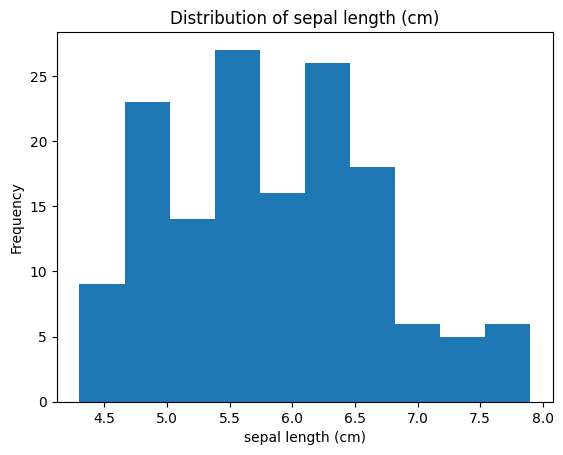

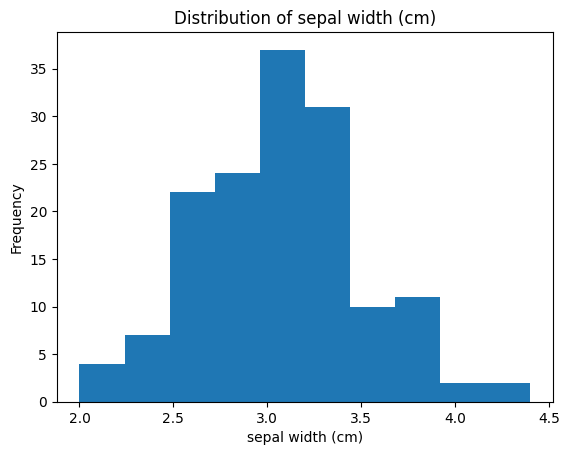

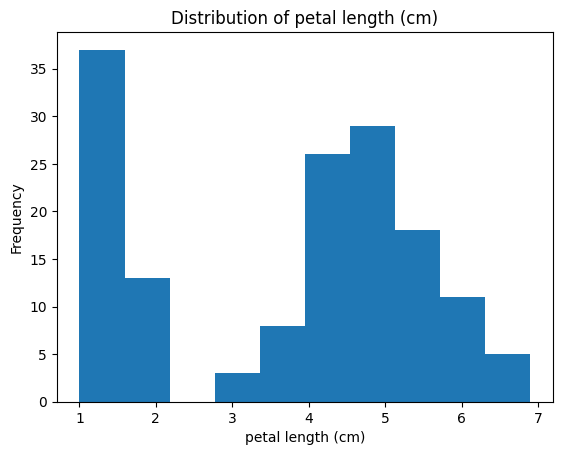

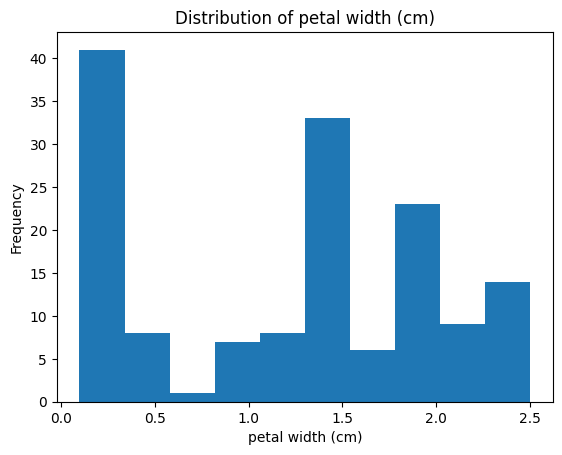

In [20]:
# **4. Checking the distribution of each feature:**

for col in iris_df.columns[0:4]:
  plt.hist(iris_df[col], bins=10)
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {col}")
  plt.show()

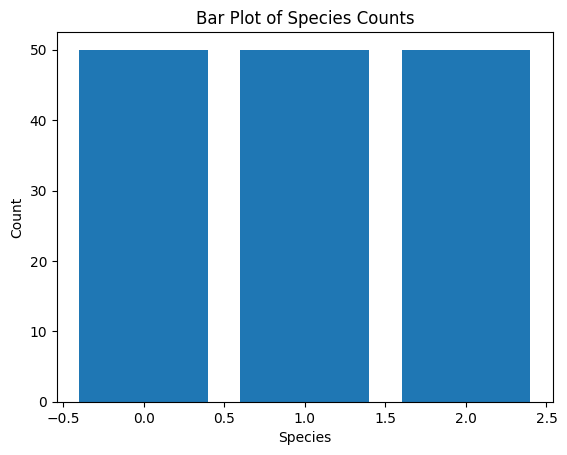

In [21]:
# **3. Bar plot:**

species_counts = iris_df["species"].value_counts()
plt.bar(species_counts.index, species_counts.values)
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Bar Plot of Species Counts")
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label encode the "species" column
label_encoder = LabelEncoder()
iris_df["species"] = label_encoder.fit_transform(iris_df["species"])

# Standardize the other columns
scaler = StandardScaler()
iris_df[iris_df.columns[0:4]] = scaler.fit_transform(iris_df[iris_df.columns[0:4]])

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


In [23]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df[iris_df.columns[0:4]], iris_df["species"], test_size=0.2)

In [24]:
# Train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# Evaluate the model on the testing set
from sklearn.metrics import accuracy_score
predictions = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9666666666666667


In [26]:

from sklearn.metrics import classification_report, confusion_matrix

# Generate the classification report
classification_report = classification_report(y_test, predictions)
print("Classification Report:\n", classification_report)



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



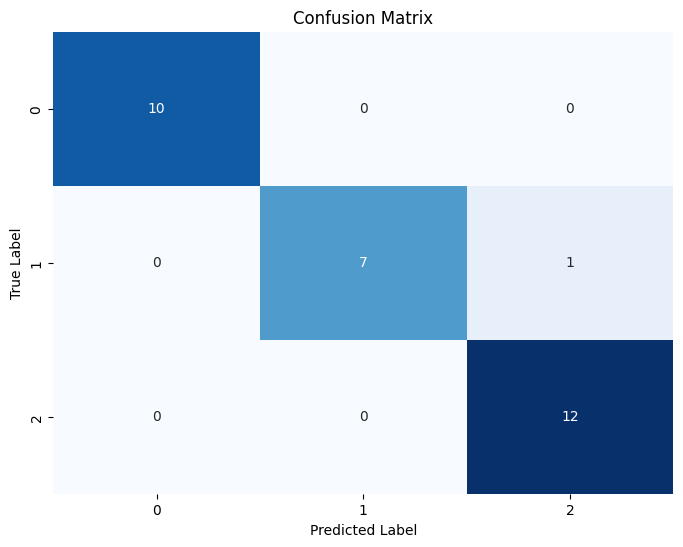

In [27]:
import seaborn as sns
# Generate the confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [28]:
import joblib

# Save the trained model to a file
joblib.dump(decision_tree, 'iris_model.joblib')


['iris_model.joblib']

In [29]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


In [30]:
%%writefile app.py
import streamlit as st
import joblib

# Set the title and header of the application
st.title("Iris Flower Classification")
st.header("Please fill in the features of the Iris flower:")

# Load the trained model outside the main function
model = joblib.load('iris_model.joblib')

# Use a single form for user input and prediction
with st.form("iris_form"):
    # Add input fields for each feature
    sepal_length = st.number_input("Sepal Length (cm):", min_value=0.0, max_value=10.0, step=0.1)
    sepal_width = st.number_input("Sepal Width (cm):", min_value=0.0, max_value=10.0, step=0.1)
    petal_length = st.number_input("Petal Length (cm):", min_value=0.0, max_value=10.0, step=0.1)
    petal_width = st.number_input("Petal Width (cm):", min_value=0.0, max_value=10.0, step=0.1)

    # Display a submit button
    submitted = st.form_submit_button("Classify")

# Define a function to handle prediction
def output():
    if submitted:
        # Make a prediction using the loaded model
        input_data = [sepal_length, sepal_width, petal_length, petal_width]
        prediction = model.predict([input_data])

        # Display the prediction
        st.write("Predicted Class:", prediction[0])

# Call the output function
output()


Writing app.py


In [31]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.361s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [32]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.90.5.39
npx: installed 22 in 3.205s
your url is: https://five-rocks-move.loca.lt
